### Runge Kutta Method to Solve for Satellite Orbit as a Function of Initial Velocity and Position


#### Variables
##### State Variables 
$X$ coordinate, $x$, 

$Y$ coordinate, $y$, 

Velocity in $x$, $V_x = \frac{\,dx}{\,dt}$, 

Velocity in $y$, $V_y = \frac{\,dy}{\,dt}$.

#### Newton's Laws:
$m \vec{a} = \frac{-GmM}{r^3} \vec{r}$

where $\vec{a} = \left(\frac{\,d^2x}{\,dt^2}, \frac{\,d^2y}{\,dt^2}\right)$
and $\vec{r} = (x,y)$.

#### Constants
$m$ = mass of satellite,

$M$ = mass of planet,

$G$ = Gravitational Constant = $6.67408*10^{-11} \frac{m^3} {kg s^2}$.

#### Differential Equations
$\frac{\,d^2x}{\,dt^2} = -GM\frac{x}{\left(x^2+y^2\right)^\frac{3}{2}}$
and
$\frac{\,d^2y}{\,dt^2} = -GM\frac{y}{\left(x^2+y^2\right)^\frac{3}{2}}$.


#### Runge Kutta Equations
Since these are second order equations, we re-arrange to first order equations of velocity components

$x_0 = x$,

$x_1 = \frac{\,dx}{\,dt}$,

$x_2 = y$,

$x_3 = \frac{dy}{dt}$.

This then leads to four first order differential equations:

$\frac{\,dx_0}{dt} = x_1$,

$\frac{\,dx_1}{dt} = -GM\frac{x_0}{\left(x_0^2+x_2^2\right)^\frac{3}{2}}$,

$\frac{\,dx_2}{dt} = x_3$,

$\frac{\,dx_3}{dt} = -GM\frac{x_2}{\left(x_0^2+x_2^2\right)^\frac{3}{2}}$.

#### Runge Kutta Numerical Setup 
$t_{n+1} = t_n + h$ where h is the time increment,

$W_{n+1} = X_n + \frac{1}{6}h\left[k_1 + 2k_2 + 2k_3 + k_4\right]$,

$k_1 = f\left(t_n,X_n\right)$,

$k_2 = f\left(t_n + \frac{h}{2},X_n + h\frac{k_1}{2}\right)$,

$k_3 = f\left(t_n + \frac{h}{2},X_n + h\frac{k_2}{2}\right)$,

$k_4 = f\left(t_n + h,X_n + hk_3\right)$,

for $W$ $\in \{x_0, x_1, x_2, x_3\}$.
##### Initial Conditions
$x_0(0) = 0$ The initial $X$ coordinate,


$x_1(0) = V_{x_0}$ The initial $X$ velocity (i.e. perpendicular to the radius),

$x_2(0) = H$ The initial $Y$ coordinate = Radius + Height,

$x_3(0) = 0$ The initial $Y$  velocity.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
def GravitationalForce(x,params):
    G = params["G"]
    Mass = params["Mass"]
    
    xdot = np.array([x[1], -G*Mass*x[0]/pow((pow(x[0],2)+pow(x[2],2)),3/2), \
                     x[3], -G*Mass*x[2]/pow((pow(x[0],2)+pow(x[2],2)),3/2)])
    
    return xdot

In [82]:
def RungeKutta4(f,x0,t0,tf,dt):
    t = np.arange(t0,tf,dt)
    nt = t.size
    
    nx = x0.size
    x = np.zeros((nx,nt))
    
    #Initialize
    x[:,0] = x0
    
    for k in range(nt-1):
        k1 = dt*f(t[k], x[:,k])
        k2 = dt*f(t[k] + dt/2, x[:,k]+k1/2)
        k3 = dt*f(t[k] + dt/2, x[:,k]+k2/2)
        k4 = dt*f(t[k] + dt, x[:,k] + k3)
        
        dx = (k1 + 2*k2 + 2*k3 + k4)/6
        
        #print (k,dx)
        x[:,k+1] = x[:,k] + dx
        
    return x,t

In [83]:
params = {"G": 6.67*pow(10,-11) , "Mass": 5.97219*pow(10,24)}
#V_init = 40270/360
V_init = 3070 #m/sec
Radius = 6371000 # radius of earth, meters
#Altitude = 20*Radius
Altitude = Radius + 35786000   # in meters, the geospatial satellite altitude
t0 = 0
tf = 300000
dt = 10  # = h


In [84]:
Altitude

42157000

In [85]:
f = lambda t, x: GravitationalForce(x,params)

#### When initial velocity is equal to geosynchronous orbit; perfect circular orbit

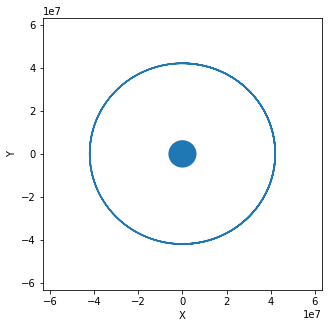

In [86]:
V_factor = 1.

x0 = np.array([0,V_factor*V_init, Altitude, 0])

x,t = RungeKutta4(f,x0,t0,tf,dt)

fig, ax = plt.subplots()

fig.set_size_inches(5,5)
ax.set_xlim((-1.5*Altitude, 1.5*Altitude))
ax.set_ylim((-1.5*Altitude, 1.5*Altitude))
#ax = plt.gca()
#ax.cla() # clear things for fresh plot
#plt.subplot (1,2,1)
plt.plot(x[0,:],x[2,:])
plt.xlabel("X")
plt.ylabel("Y")
earth = plt.Circle((0, 0), Radius)
#plt.plot(x[2,:], "b", label= "Y")
ax.add_patch(earth)
plt.show()


#### When initial velocity is lower but still enough to support orbit; Elliptical orbit

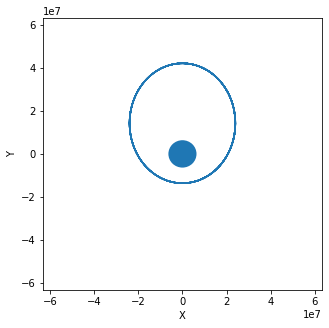

In [87]:
V_factor = 0.7

x0 = np.array([0,V_factor*V_init, Altitude, 0])

x,t = RungeKutta4(f,x0,t0,tf,dt)

fig, ax = plt.subplots()

fig.set_size_inches(5,5)
ax.set_xlim((-1.5*Altitude, 1.5*Altitude))
ax.set_ylim((-1.5*Altitude, 1.5*Altitude))
#ax = plt.gca()
#ax.cla() # clear things for fresh plot
#plt.subplot (1,2,1)
plt.plot(x[0,:],x[2,:])
plt.xlabel("X")
plt.ylabel("Y")
earth = plt.Circle((0, 0), Radius)
#plt.plot(x[2,:], "b", label= "Y")
ax.add_patch(earth)
plt.show()

#### When initial velocity is very low such that the satellite crashes!!!

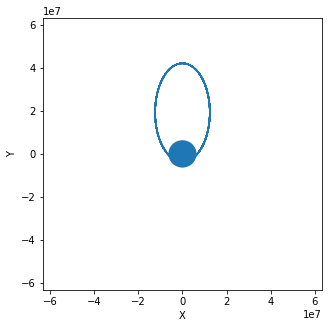

In [88]:
V_factor = 0.4

x0 = np.array([0,V_factor*V_init, Altitude, 0])

x,t = RungeKutta4(f,x0,t0,tf,dt)

fig, ax = plt.subplots()

fig.set_size_inches(5,5)
ax.set_xlim((-1.5*Altitude, 1.5*Altitude))
ax.set_ylim((-1.5*Altitude, 1.5*Altitude))
#ax = plt.gca()
#ax.cla() # clear things for fresh plot
#plt.subplot (1,2,1)
plt.plot(x[0,:],x[2,:])
plt.xlabel("X")
plt.ylabel("Y")
earth = plt.Circle((0, 0), Radius)
#plt.plot(x[2,:], "b", label= "Y")
ax.add_patch(earth)
plt.show()

#### When initial velocity > escape velocity, the satellite is lost!



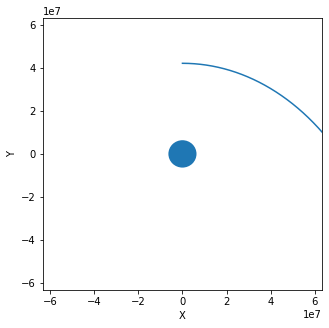

In [89]:
V_factor = 1.3

x0 = np.array([0,V_factor*V_init, Altitude, 0])

x,t = RungeKutta4(f,x0,t0,tf,dt)

fig, ax = plt.subplots()

fig.set_size_inches(5,5)
ax.set_xlim((-1.5*Altitude, 1.5*Altitude))
ax.set_ylim((-1.5*Altitude, 1.5*Altitude))
#ax = plt.gca()
#ax.cla() # clear things for fresh plot
#plt.subplot (1,2,1)
plt.plot(x[0,:],x[2,:])
plt.xlabel("X")
plt.ylabel("Y")
earth = plt.Circle((0, 0), Radius)
#plt.plot(x[2,:], "b", label= "Y")
ax.add_patch(earth)
plt.show()

In [90]:
#x0 = x coord
#x1 = x velocity
#x2 = y coord
#x3 = y velocity

x[0:1:100]

array([[ 0.00000000e+00,  3.99099965e+04,  7.98199717e+04, ...,
        -4.05394858e+07, -4.05465139e+07, -4.05535418e+07]])

In [91]:
pd.set_option('display.max_rows', 200)


lis = []
for j in range (0,101):
    lis1 = [[ x[0,j], x[2,j], x[1,j], x[3,j]]]
    lis.extend(lis1)

cols = ['x_0', 'x_1', 'x_2', 'x_3']
df = pd.DataFrame(lis,columns=cols)

In [92]:
df

,x_0,x_1,x_2,x_3
0,0.000,42157000.000,3991.000,0.000
1,39909.996,42156988.793,3990.999,-2.241
2,79819.972,42156955.172,3990.996,-4.483
3,119729.905,42156899.137,3990.990,-6.724
4,159639.774,42156820.688,3990.983,-8.966
5,199549.558,42156719.826,3990.973,-11.207
6,239459.236,42156596.549,3990.962,-13.448
7,279368.787,42156450.860,3990.948,-15.690
8,319278.189,42156282.757,3990.932,-17.931
9,359187.422,42156092.242,3990.914,-20.172
